<a href="https://colab.research.google.com/github/NabilahSharfina/Ruangguru-Bootcamp/blob/main/Product_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***PRODUCT***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load data from google

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

## Table inventory_items

In [49]:
inv_items = pd.read_csv('/content/drive/MyDrive/KAMPUS MERDEKA BATCH 2/Project Ruang Guru Kel 255/Dataset Final Project DBA/inventory_items.csv')
inv_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,90967,16898,2021-07-19 02:20:10+00:00,2021-07-20 14:34:10+00:00,13.92499997,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.00000000,Men,22811EE19846217512507785E74D12CC,3
1,90968,16898,2020-04-13 07:46:00+00:00,NaN,13.92499997,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.00000000,Men,22811EE19846217512507785E74D12CC,3
2,90969,16898,2020-09-02 17:43:00+00:00,NaN,13.92499997,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.00000000,Men,22811EE19846217512507785E74D12CC,3
3,90970,16898,2021-08-19 15:17:00+00:00,NaN,13.92499997,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.00000000,Men,22811EE19846217512507785E74D12CC,3
4,96715,16898,2020-05-09 11:16:10+00:00,2020-06-23 23:59:10+00:00,13.92499997,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.00000000,Men,22811EE19846217512507785E74D12CC,3


In [ ]:
inv_items.shape

(487394, 12)

In [ ]:
inv_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              487394 non-null  int64  
 1   product_id                      487394 non-null  int64  
 2   created_at                      487394 non-null  object 
 3   sold_at                         180508 non-null  object 
 4   cost                            487394 non-null  float64
 5   product_category                487394 non-null  object 
 6   product_name                    487359 non-null  object 
 7   product_brand                   487020 non-null  object 
 8   product_retail_price            487394 non-null  float64
 9   product_department              487394 non-null  object 
 10  product_sku                     487394 non-null  object 
 11  product_distribution_center_id  487394 non-null  int64  
dtypes: float64(2), i

**Keterangan:**
1. Dataframe memiliki total 487.394 baris dan 12 kolom.
2. Dataframe masih memiliki *null values* di kolom `sold_at`.
3. Target klasifikasi adalah kolom `product_distribution_center_id` dengan tipe data `int64`
4. Berarti sisanya adalah *feature* (predictor)

Dari informasi di atas, bisa dikelompokkan kolom kategorical dan numerical sebagai berikut:

In [ ]:
# Kelompok categorical & numerical
inv_cats = ['created_at', 'sold_at', 'product_category', 'product_name', 'product_brand', 'product_department', 'product_sku']
inv_nums = ['id', 'product_id', 'cost', 'product_retail_price', 'product_distribution_center_id']

In [ ]:
inv_items.columns.values

array(['id', 'product_id', 'created_at', 'sold_at', 'cost',
       'product_category', 'product_name', 'product_brand',
       'product_retail_price', 'product_department', 'product_sku',
       'product_distribution_center_id'], dtype=object)

In [ ]:
inv_items.dtypes

id                                  int64
product_id                          int64
created_at                         object
sold_at                            object
cost                              float64
product_category                   object
product_name                       object
product_brand                      object
product_retail_price              float64
product_department                 object
product_sku                        object
product_distribution_center_id      int64
dtype: object

In [ ]:
inv_items.count()

id                                487394
product_id                        487394
created_at                        487394
sold_at                           180508
cost                              487394
product_category                  487394
product_name                      487359
product_brand                     487020
product_retail_price              487394
product_department                487394
product_sku                       487394
product_distribution_center_id    487394
dtype: int64

### A. Read Data with Indexing Time

> Referensi 
1. https://github.com/Bounteous-Inc/Time-Series-Prediction/blob/master/Time%20Series%20Prediction%20Temp.ipynb
2. https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/
3. https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-two/

In [63]:
inv_items.dropna(subset=['sold_at'], inplace=True)

inv_items['date'] = inv_items['sold_at'].apply(lambda x : x[:10])

df_items_series = pd.DataFrame(inv_items[inv_items['product_category'] == 'Outerwear & Coats'].groupby('date').count()['id'])

df_items_series_new = df_items_series[-150:]
df_items_series_new = df_items_series_new.reset_index()

# Set type object to type datetime
df_items_series_new['date'] = pd.to_datetime(df_items_series_new['date'])
df_items_series_new

,date,id
0,2022-01-08,12
1,2022-01-09,14
2,2022-01-10,19
3,2022-01-11,19
4,2022-01-12,16
...,...,...
145,2022-06-02,61
146,2022-06-03,24
147,2022-06-04,21
148,2022-06-05,8


In [53]:
# Detail info data inventory_items
df_items_series_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    150 non-null    datetime64[ns]
 1   id      150 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.5 KB


In [64]:
# Set the date as index 
df_items_series_new = df_items_series_new.set_index('date')

# Select the proper time period for weekly aggreagation
df_items_series_new = df_items_series_new['2022-01-01':'2022-12-31'].resample('W').sum()
df_items_series_new

,id
date,
2022-01-09,26
2022-01-16,127
2022-01-23,90
2022-01-30,107
2022-02-06,133
2022-02-13,106
2022-02-20,109
2022-02-27,124
2022-03-06,147


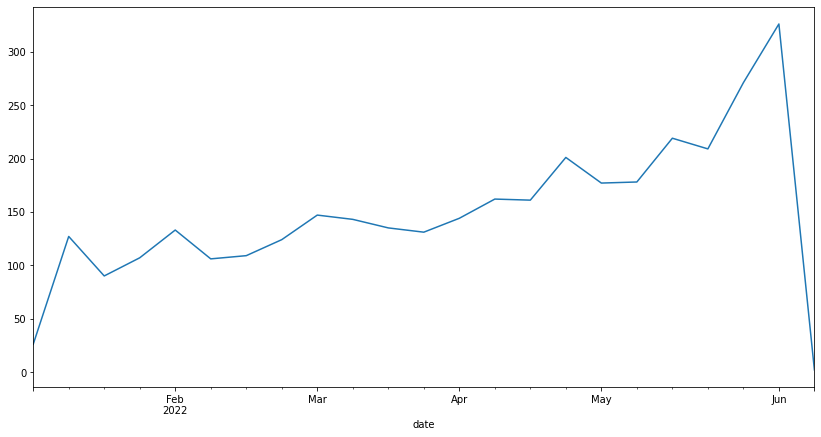

In [66]:
# Visualization data di bulan Januari 2022 - Desember 2022
df_items_series_new['id'].plot(figsize=(14, 7))

### B. Visualization Data

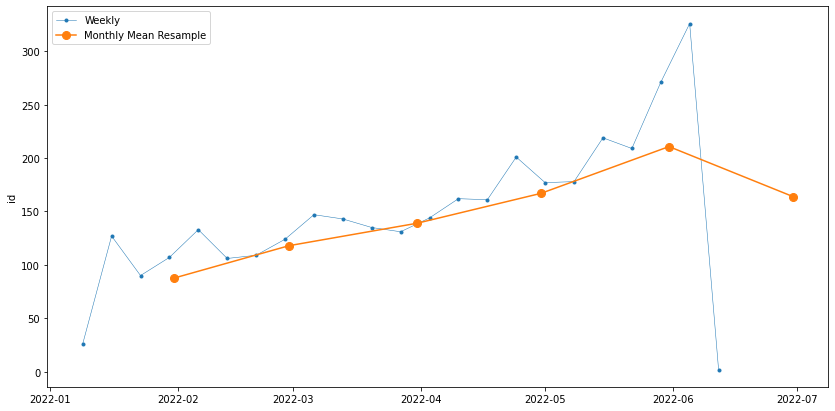

In [67]:
# Visualization data
import matplotlib.pyplot as plt

y = df_items_series_new['id']
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('id')
ax.legend();

### C. Decomposing Data

In [68]:
import statsmodels.api as sm

# Graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14, 7)
    plt.show()

seasonal_decompose(y)

ValueError: ignored

### D. Checking Stationary

#### 1. Visualization: Graphing the rolling statistics

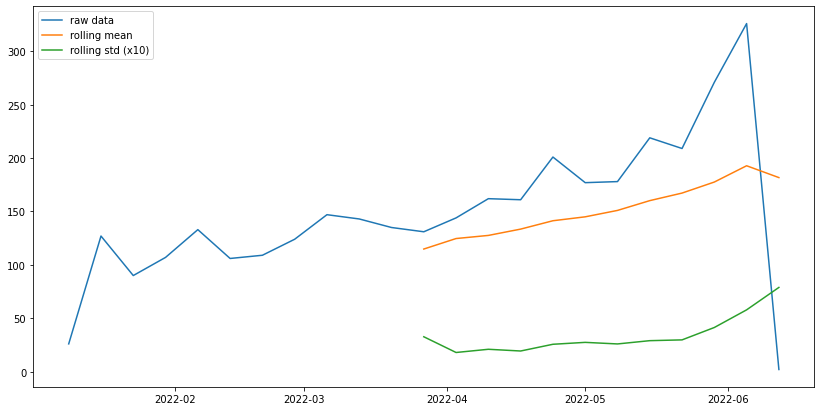

In [70]:
# Plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    # Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y, 'raw data')

#### 2. Augmented Dickey-Fuller Test

In [71]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print('> Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('\tTest statistic = {:.3f}'.format(dftest[0]))
    print('\tP-value = {:.3f}'.format(dftest[1]))
    print('\tCritical values\t:')
    for k, v in dftest[4].items():
        print('\t\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

ADF_test(y, 'raw data')

> Is the raw data stationary ?
	Test statistic = 1.199
	P-value = 0.996
	Critical values	:
		1%: -3.9644434814814815 - The data is not stationary with 99% confidence
		5%: -3.0849081481481484 - The data is not stationary with 95% confidence
		10%: -2.6818144444444445 - The data is not stationary with 90% confidence


#### 3. Detrending

> Is the de-trended data stationary ?
	Test statistic = -2.949
	P-value = 0.040
	Critical values	:
		1%: -4.6651863281249994 - The data is not stationary with 99% confidence
		5%: -3.3671868750000002 - The data is not stationary with 95% confidence
		10%: -2.802960625 - The data is  stationary with 90% confidence


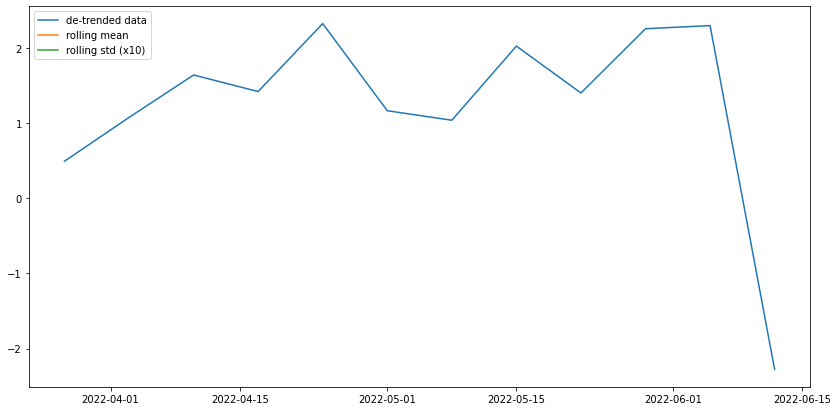

In [72]:
# Detrending
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend, 'de-trended data')
ADF_test(y_detrend, 'de-trended data')

#### 4. Differencing

> Is the 12 lag differenced data stationary ?
	Test statistic = -3.588
	P-value = 0.006
	Critical values	:
		1%: -4.331573 - The data is not stationary with 99% confidence
		5%: -3.23295 - The data is  stationary with 95% confidence
		10%: -2.7487 - The data is  stationary with 90% confidence


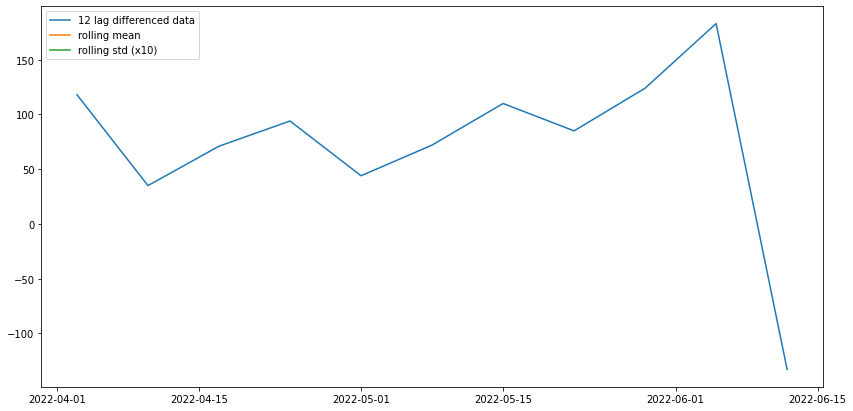

In [73]:
# Differencing
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag, '12 lag differenced data')
ADF_test(y_12lag, '12 lag differenced data')

#### 5. Detrending & Differencing

> Is the 12 lag differenced de-trended data stationary ?


ValueError: ignored

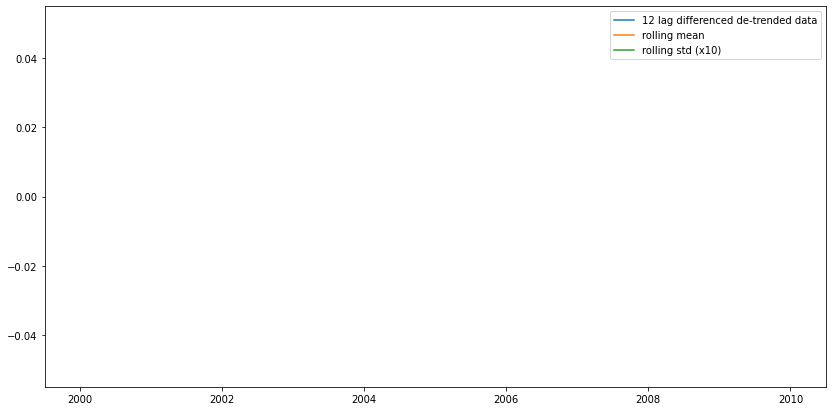

In [74]:
# Detrending + Differencing
y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend, '12 lag differenced de-trended data')
ADF_test(y_12lag_detrend, '12 lag differenced de-trended data')

### E. Set Data Train, Test, Length

In [ ]:
y_to_train = y[:'2021-10-28'] # dataset to train
y_to_val = y['2021-11-03':] # last X months for test  
predict_date = len(y) - len(y[:'2021-11-03']) # the number of data points for the test set

### F. Different Time Series Prediction Models

#### 1. Simple Exponential Smoothing


The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 386493217.49
The Root Mean Squared Error of our forecasts with auto optimization is 388545555.45


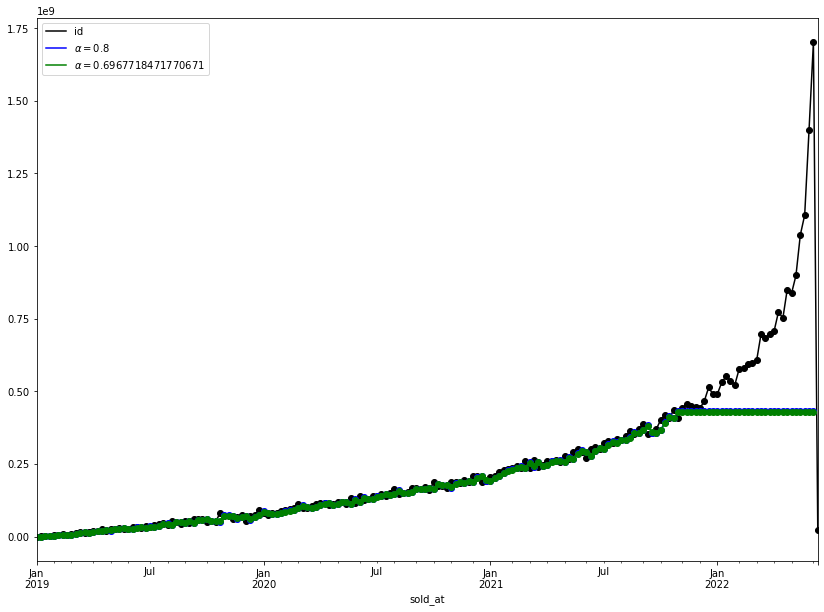

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(y, y_to_train, y_to_test, smoothing_level, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 10))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # Specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level, round(np.sqrt(mse1), 2)))
    
    # Auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # Plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

ses(y, y_to_train, y_to_val, 0.8, predict_date)

#### 2. Holt

## Table products

In [ ]:
products = pd.read_csv('/content/drive/MyDrive/KAMPUS MERDEKA BATCH 2/Project Ruang Guru Kel 255/Dataset Final Project DBA/products.csv')
products

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,27569,92.652563,Swim,2XU Men's Swimmers Compression Long Sleeve Top,2XU,150.410004,Men,B23C5765E165D83AA924FA8F13C05F25,1
1,27445,24.719661,Swim,TYR Sport Men's Square Leg Short Swim Suit,TYR,38.990002,Men,2AB7D3B23574C3DEA2BD278AFD0939AB,1
2,27457,15.897600,Swim,TYR Sport Men's Solid Durafast Jammer Swim Suit,TYR,27.600000,Men,8F831227B0EB6C6D09A0555531365933,1
3,27466,17.850000,Swim,TYR Sport Men's Swim Short/Resistance Short Sw...,TYR,30.000000,Men,67317D6DCC4CB778AEB9219565F5456B,1
4,27481,29.408001,Swim,TYR Alliance Team Splice Jammer,TYR,45.950001,Men,213C888198806EF1A0E2BBF2F4855C6C,1
...,...,...,...,...,...,...,...,...,...
29115,1993,22.150999,Fashion Hoodies & Sweatshirts,Comfort Colors C1598 Womens Full-Zip Hooded Fl...,Comfort Colors,52.119999,Women,C5A4E7E6882845EA7BB4D9462868219B,10
29116,2062,18.973360,Fashion Hoodies & Sweatshirts,Comfort Colors Pigment-Dyed Ladies Full-Zip Ho...,Comfort Colors,39.860001,Women,2D405B367158E3F12D7C1E31A96B3AF3,10
29117,2308,9.028020,Fashion Hoodies & Sweatshirts,Comfort Colors by Chouinard Women's Drawstring...,Comfort Colors,18.020000,Women,E58AEA67B01FA747687F038DFDE066F6,10
29118,1852,17.674240,Fashion Hoodies & Sweatshirts,DV by Dolce Vita Women's Larisa Hooded Sweatshirt,DV by Dolce Vita,34.520000,Women,EB1E78328C46506B46A4AC4A1E378B91,10


In [ ]:
products.shape

(29120, 9)

In [ ]:
products.columns.values

array(['id', 'cost', 'category', 'name', 'brand', 'retail_price',
       'department', 'sku', 'distribution_center_id'], dtype=object)

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29120 non-null  int64  
 1   cost                    29120 non-null  float64
 2   category                29120 non-null  object 
 3   name                    29118 non-null  object 
 4   brand                   29096 non-null  object 
 5   retail_price            29120 non-null  float64
 6   department              29120 non-null  object 
 7   sku                     29120 non-null  object 
 8   distribution_center_id  29120 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [ ]:
products.dtypes

id                          int64
cost                      float64
category                   object
name                       object
brand                      object
retail_price              float64
department                 object
sku                        object
distribution_center_id      int64
dtype: object

In [ ]:
products.count()

id                        29120
cost                      29120
category                  29120
name                      29118
brand                     29096
retail_price              29120
department                29120
sku                       29120
distribution_center_id    29120
dtype: int64

In [ ]:
# Numerical Data
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']

display(products.select_dtypes(include = numerics).columns)
print(products.select_dtypes(include = numerics).shape)

df_num_products = products.select_dtypes(include = numerics)
df_num_products.head()

Index(['id', 'cost', 'retail_price', 'distribution_center_id'], dtype='object')

(29120, 4)


,id,cost,retail_price,distribution_center_id
0,27569,92.652563,150.410004,1
1,27445,24.719661,38.990002,1
2,27457,15.897600,27.600000,1
3,27466,17.850000,30.000000,1
4,27481,29.408001,45.950001,1


In [ ]:
df_num_products.describe().transpose()

,id,cost,retail_price,distribution_center_id
count,29120.000000,29120.000000,29120.000000,29120.000000
mean,14560.500000,28.481774,59.220164,4.982898
std,8406.364256,30.624681,65.888927,2.901153
min,1.000000,0.008300,0.020000,1.000000
25%,7280.750000,11.275613,24.000000,2.000000
50%,14560.500000,19.675081,39.990002,5.000000
75%,21840.250000,34.440000,69.949997,8.000000
max,29120.000000,557.151002,999.000000,10.000000


In [ ]:
# Non Numerical Data
display(products.select_dtypes(include = ['object']).columns)
print(products.select_dtypes(include = object).shape)

df_cat_products = products.select_dtypes(include = ['object'])
df_cat_products.head()

Index(['category', 'name', 'brand', 'department', 'sku'], dtype='object')

(29120, 5)


,category,name,brand,department,sku
0,Swim,2XU Men's Swimmers Compression Long Sleeve Top,2XU,Men,B23C5765E165D83AA924FA8F13C05F25
1,Swim,TYR Sport Men's Square Leg Short Swim Suit,TYR,Men,2AB7D3B23574C3DEA2BD278AFD0939AB
2,Swim,TYR Sport Men's Solid Durafast Jammer Swim Suit,TYR,Men,8F831227B0EB6C6D09A0555531365933
3,Swim,TYR Sport Men's Swim Short/Resistance Short Swim Suit,TYR,Men,67317D6DCC4CB778AEB9219565F5456B
4,Swim,TYR Alliance Team Splice Jammer,TYR,Men,213C888198806EF1A0E2BBF2F4855C6C


In [ ]:
df_cat_products.describe()

,category,name,brand,department,sku
count,29120,29118,29096,29120,29120
unique,26,27309,2756,2,29120
top,Intimates,Wrangler Men's Premium Performance Cowboy Cut Jean,Allegra K,Women,B23C5765E165D83AA924FA8F13C05F25
freq,2363,8,1034,15989,1


In [ ]:
# Cek missing value
products.isnull().sum()

id                         0
cost                       0
category                   0
name                       2
brand                     24
retail_price               0
department                 0
sku                        0
distribution_center_id     0
dtype: int64

In [ ]:
rows = []
for col in df_cat_products :
  rows.append(
    {
      'Nama Kolom': col,
      'Total Unique Values': len(products[col].unique()),
      'Unique Values':  products[col].unique()
    }
  )

# pd.options.display.max_colwidth = 100 #maksimal tampil 100 karakter
# maksimal tampil 70 karakter
pd.options.display.max_colwidth = 70 

# pd.options.display.max_colwidth 
# tanpa batas 
unik_products = pd.DataFrame(rows)
unik_products.sort_values(by='Total Unique Values', ascending=False).reset_index().drop('index', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,Nama Kolom,Total Unique Values,Unique Values
0,sku,29120,"[B23C5765E165D83AA924FA8F13C05F25, 2AB7D3B23574C3DEA2BD278AFD0939A..."
1,name,27310,"[2XU Men's Swimmers Compression Long Sleeve Top, TYR Sport Men's S..."
2,brand,2757,"[2XU, TYR, Onia, 2EROS, Matix, Alki'i, Hurley, TRUNKS, Ezekiel, Ru..."
3,category,26,"[Swim, Jeans, Pants, Socks, Active, Shorts, Sweaters, Underwear, A..."
4,department,2,"[Men, Women]"


**Fungsi count():**
This gives the number of non-missing values for each variable and is extremely useful while handling missing values in a data frame.

### Descriptive Statistic

#### Table inventory_items

**Fungsi describe():**
Get the following characteristics of the numerical variables namely to count (number of non-missing values), mean, standard deviation, and the 5 point summary which includes minimum, first quartile, second quartile, third quartile, and maximum.

In [ ]:
inv_items.describe()

,id,product_id,cost,product_retail_price,product_distribution_center_id
count,487394.000000,487394.000000,487394.000000,487394.000000,487394.000000
mean,243697.500000,15292.257424,28.746374,59.772834,4.992101
std,140698.672888,8408.118539,30.629290,65.871768,2.895917
min,1.000000,1.000000,0.008300,0.020000,1.000000
25%,121849.250000,8047.000000,11.394300,24.780001,2.000000
50%,243697.500000,16032.000000,19.944301,39.990002,5.000000
75%,365545.750000,22558.000000,34.698691,69.949997,8.000000
max,487394.000000,29120.000000,557.151002,999.000000,10.000000


Beberapa pengamatan dari *statistical summary* kolom numerik di atas:
- Distribusi nilai di kolom `id` dan `product_id` terlihat normal (*mean* dan *median* selisihnya tidak terlalu jauh).
- Nilai Q2 berada tepat di antara Q1 - Q3)
- Kolom `cost`, `product_retail_price`, dan `product_distribution_center_id` tampaknya tidak simetrik, karena *mean* > *median*.

In [ ]:
inv_items.describe(include='all')

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
count,487394.000000,487394.000000,487394,180508,487394.000000,487394,487359,487020,487394.000000,487394,487394,487394.000000
unique,NaN,NaN,444495,180172,NaN,26,27247,2754,NaN,2,29050,NaN
top,NaN,NaN,2021-01-18 09:21:00+00:00,2022-03-10 07:49:24+00:00,NaN,Intimates,Wrangler Men's Premium Performance Cowboy Cut ...,Allegra K,NaN,Men,CD79499E36195AC3C3296EB666F9D39E,NaN
freq,NaN,NaN,5,3,NaN,36319,147,16392,NaN,244421,55,NaN
mean,243697.500000,15292.257424,NaN,NaN,28.746374,NaN,NaN,NaN,59.772834,NaN,NaN,4.992101
std,140698.672888,8408.118539,NaN,NaN,30.629290,NaN,NaN,NaN,65.871768,NaN,NaN,2.895917
min,1.000000,1.000000,NaN,NaN,0.008300,NaN,NaN,NaN,0.020000,NaN,NaN,1.000000
25%,121849.250000,8047.000000,NaN,NaN,11.394300,NaN,NaN,NaN,24.780001,NaN,NaN,2.000000
50%,243697.500000,16032.000000,NaN,NaN,19.944301,NaN,NaN,NaN,39.990002,NaN,NaN,5.000000
75%,365545.750000,22558.000000,NaN,NaN,34.698691,NaN,NaN,NaN,69.949997,NaN,NaN,8.000000


##### Data Numerical

In [ ]:
# Data Numerical 
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']

display(inv_items.select_dtypes(include = numerics).columns)
print(inv_items.select_dtypes(include = numerics).shape)

df_num_inv_items = inv_items.select_dtypes(include = numerics)
df_num_inv_items.head()

Index(['id', 'product_id', 'cost', 'product_retail_price',
       'product_distribution_center_id'],
      dtype='object')

(487394, 5)


,id,product_id,cost,product_retail_price,product_distribution_center_id
0,90967,16898,13.925,25.0,3
1,90968,16898,13.925,25.0,3
2,90969,16898,13.925,25.0,3
3,90970,16898,13.925,25.0,3
4,96715,16898,13.925,25.0,3


In [ ]:
df_num_inv_items.describe()

,id,product_id,cost,product_retail_price,product_distribution_center_id
count,487394.000000,487394.000000,487394.000000,487394.000000,487394.000000
mean,243697.500000,15292.257424,28.746374,59.772834,4.992101
std,140698.672888,8408.118539,30.629290,65.871768,2.895917
min,1.000000,1.000000,0.008300,0.020000,1.000000
25%,121849.250000,8047.000000,11.394300,24.780001,2.000000
50%,243697.500000,16032.000000,19.944301,39.990002,5.000000
75%,365545.750000,22558.000000,34.698691,69.949997,8.000000
max,487394.000000,29120.000000,557.151002,999.000000,10.000000


**Keterangan:**

1. Ada 487.394 baris data, mungkin terdapat duplikasi / missing value
2. 25 % = Q1; 50 % = Q2; 75 % = Q3
3. Mean ~ 50% (Median), semua kolom tidak ada yang memiliki distribusi simetris. | Mean > 50% (Median), semua kolom memiliki skewed distribution ke kanan / positif. | Mean ~ 50% (Median), tidak ada kolum dgn skewed negatif / ke kiri.

In [ ]:
inv_items[inv_nums].describe()

,id,product_id,cost,product_retail_price,product_distribution_center_id
count,487394.000000,487394.000000,487394.000000,487394.000000,487394.000000
mean,243697.500000,15292.257424,28.746374,59.772834,4.992101
std,140698.672888,8408.118539,30.629290,65.871768,2.895917
min,1.000000,1.000000,0.008300,0.020000,1.000000
25%,121849.250000,8047.000000,11.394300,24.780001,2.000000
50%,243697.500000,16032.000000,19.944301,39.990002,5.000000
75%,365545.750000,22558.000000,34.698691,69.949997,8.000000
max,487394.000000,29120.000000,557.151002,999.000000,10.000000


##### Data Categorical

In [ ]:
# Data Categorical
display(inv_items.select_dtypes(include = ['object']).columns)
print(inv_items.select_dtypes(include = object).shape)

df_cat_inv_items = inv_items.select_dtypes(include = ['object'])
df_cat_inv_items.head()

Index(['created_at', 'sold_at', 'product_category', 'product_name',
       'product_brand', 'product_department', 'product_sku'],
      dtype='object')

(487394, 7)


,created_at,sold_at,product_category,product_name,product_brand,product_department,product_sku
0,2021-07-19 02:20:10+00:00,2021-07-20 14:34:10+00:00,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,Men,22811EE19846217512507785E74D12CC
1,2020-04-13 07:46:00+00:00,NaN,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,Men,22811EE19846217512507785E74D12CC
2,2020-09-02 17:43:00+00:00,NaN,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,Men,22811EE19846217512507785E74D12CC
3,2021-08-19 15:17:00+00:00,NaN,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,Men,22811EE19846217512507785E74D12CC
4,2020-05-09 11:16:10+00:00,2020-06-23 23:59:10+00:00,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,Men,22811EE19846217512507785E74D12CC


In [ ]:
df_cat_inv_items.describe()

,created_at,sold_at,product_category,product_name,product_brand,product_department,product_sku
count,487394,180508,487394,487359,487020,487394,487394
unique,444495,180172,26,27247,2754,2,29050
top,2021-01-18 09:21:00+00:00,2022-03-10 07:49:24+00:00,Intimates,Wrangler Men's Premium Performance Cowboy Cut ...,Allegra K,Men,CD79499E36195AC3C3296EB666F9D39E
freq,5,3,36319,147,16392,244421,55


In [ ]:
rows = []
for col in df_cat_inv_items :
  rows.append(
    {
      'Nama Kolom': col,
      'Total Unique Values': len(inv_items[col].unique()),
      'Unique Values':  inv_items[col].unique()
    }
  )
# pd.options.display.max_colwidth = 100 #maksimal tampil 100 karakter
# maksimal tampil 70 karakter
pd.options.display.max_colwidth = 70 

# pd.options.display.max_colwidth 
# tanpa batas 
unik_inv_items = pd.DataFrame(rows)
unik_inv_items.sort_values(by='Total Unique Values', ascending=False).reset_index().drop('index', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,Nama Kolom,Total Unique Values,Unique Values
0,created_at,444495,"[2021-07-19 02:20:10+00:00, 2020-04-13 07:46:00+00:00, 2020-09-02 ..."
1,sold_at,180173,"[2021-07-20 14:34:10+00:00, nan, 2020-06-23 23:59:10+00:00, 2021-0..."
2,product_sku,29050,"[22811EE19846217512507785E74D12CC, C5A3C867A3DFB776552DCFC804D4937..."
3,product_name,27248,"[Quiksilver Waterman Men's On The Rise, KEEN Women Bellingham Low ..."
4,product_brand,2755,"[nan, H, BB, BG, CB, DC, GM, I5, JM, Ks, L1, MG, MR, MW, QT, SY, S..."
5,product_category,26,"[Tops & Tees, Socks & Hosiery, Accessories, Socks, Fashion Hoodies..."
6,product_department,2,"[Men, Women]"


In [ ]:
created_at = inv_items['created_at'].value_counts().reset_index()
created_at.columns = ['created_at', 'FREQ']
created_at['PERCENTAGE'] = round((created_at['FREQ']/created_at['FREQ'].sum())*100,2)
created_at = created_at[0:5]
created_at.head(10)

,created_at,FREQ,PERCENTAGE
0,2021-01-18 09:21:00+00:00,5,0.0
1,2020-03-06 14:57:00+00:00,5,0.0
2,2022-03-20 14:50:00+00:00,5,0.0
3,2021-08-19 13:30:00+00:00,5,0.0
4,2022-04-10 18:04:00+00:00,5,0.0


In [ ]:
sold_at = inv_items['sold_at'].value_counts().reset_index()
sold_at.columns = ['sold_at', 'FREQ']
sold_at['PERCENTAGE'] = round((sold_at['FREQ']/sold_at['FREQ'].sum())*100,2)
sold_at = sold_at[0:5]
sold_at.head(10)

,sold_at,FREQ,PERCENTAGE
0,2022-03-10 07:49:24+00:00,3,0.0
1,2021-09-03 00:28:46+00:00,2,0.0
2,2022-04-18 07:59:47+00:00,2,0.0
3,2020-12-26 01:47:37+00:00,2,0.0
4,2022-03-16 15:58:05+00:00,2,0.0


In [ ]:
product_sku = inv_items['product_sku'].value_counts().reset_index()
product_sku.columns = ['product_sku', 'FREQ']
product_sku['PERCENTAGE'] = round((product_sku['FREQ']/product_sku['FREQ'].sum())*100,2)
product_sku = product_sku[0:5]
product_sku.head(10)

,product_sku,FREQ,PERCENTAGE
0,CD79499E36195AC3C3296EB666F9D39E,55,0.01
1,2328FB211593BF76F1E22FF0554CB420,55,0.01
2,F935853FC0ABAAA1019E7255EB7CC251,51,0.01
3,8A707D3CEDA7305AF3CDBC1FFDDC67DB,50,0.01
4,DACD97650582D1486C081ADC286D8EA7,50,0.01


In [ ]:
product_name = inv_items['product_name'].value_counts().reset_index()
product_name.columns = ['product_name', 'FREQ']
product_name['PERCENTAGE'] = round((product_name['FREQ']/product_name['FREQ'].sum())*100,2)
product_name = product_name[0:5]
product_name.head(10)

,product_name,FREQ,PERCENTAGE
0,Wrangler Men's Premium Performance Cowboy Cut ...,147,0.03
1,7 For All Mankind Men's Standard Classic Strai...,144,0.03
2,Wrangler Men's Rugged Wear Classic Fit Jean,98,0.02
3,Thorlo Unisex Experia Running Sock,95,0.02
4,HUGO BOSS Men's Long Pant,91,0.02


In [ ]:
product_brand = inv_items['product_brand'].value_counts().reset_index()
product_brand.columns = ['product_brand', 'FREQ']
product_brand['PERCENTAGE'] = round((product_brand['FREQ']/product_brand['FREQ'].sum())*100,2)
product_brand = product_brand[0:5]
product_brand.head(10)

,product_brand,FREQ,PERCENTAGE
0,Allegra K,16392,3.37
1,Calvin Klein,8607,1.77
2,Carhartt,6819,1.40
3,Hanes,5227,1.07
4,Volcom,5164,1.06


In [ ]:
product_category = inv_items['product_category'].value_counts().reset_index()
product_category.columns = ['product_category', 'FREQ']
product_category['PERCENTAGE'] = round((product_category['FREQ']/product_category['FREQ'].sum())*100,2)
product_category = product_category[0:5]
product_category.head(10)

,product_category,FREQ,PERCENTAGE
0,Intimates,36319,7.45
1,Jeans,34319,7.04
2,Fashion Hoodies & Sweatshirts,31926,6.55
3,Tops & Tees,31842,6.53
4,Swim,30228,6.20


In [ ]:
product_department = inv_items['product_department'].value_counts().reset_index()
product_department.columns = ['product_department', 'FREQ']
product_department['PERCENTAGE'] = round((product_department['FREQ']/product_department['FREQ'].sum())*100,2)
product_department = product_department[0:5]
product_department.head(10)

,product_department,FREQ,PERCENTAGE
0,Men,244421,50.15
1,Women,242973,49.85


In [ ]:
inv_items[inv_cats].describe().transpose()

,count,unique,top,freq
created_at,487394,444495,2021-01-18 09:21:00+00:00,5
sold_at,180508,180172,2022-03-10 07:49:24+00:00,3
product_category,487394,26,Intimates,36319
product_name,487359,27247,Wrangler Men's Premium Performance Cowboy Cut ...,147
product_brand,487020,2754,Allegra K,16392
product_department,487394,2,Men,244421
product_sku,487394,29050,CD79499E36195AC3C3296EB666F9D39E,55


Beberapa pengamatan dari *statistical summary* kolom data categorical di atas:
* Kolom `created_at` memiliki jumlah nilai unik terbanyak, ada kemungkinan tidak terlalu berpengaruh untuk menjadi data predictor.

In [ ]:
# Jumlah baris cost yang negative
inv_items[inv_items['cost']<0].shape[0]

0

In [ ]:
# Jumlah baris product_distribution_center_id yang negative
inv_items[inv_items['product_distribution_center_id']<0].shape[0]

0

In [ ]:
# Cek missing value
inv_items.isnull().sum()

id                                     0
product_id                             0
created_at                             0
sold_at                           306886
cost                                   0
product_category                       0
product_name                          35
product_brand                        374
product_retail_price                   0
product_department                     0
product_sku                            0
product_distribution_center_id         0
dtype: int64

#### Table products

**Fungsi (include='all'):**
By providing the include argument and assigning it the value ‘all’ we get the summary of the categorical variables too. For the categorical variables, we get the characteristics: count (number of non-missing values) , unique (number of unique values), top (the most frequent value), and the frequency of the most frequent value.

In [ ]:
products.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,29120.0,14560.500000,8406.364256,1.0000,7280.750000,14560.500000,21840.250000,29120.000000
cost,29120.0,28.481774,30.624681,0.0083,11.275613,19.675081,34.440000,557.151002
retail_price,29120.0,59.220164,65.888927,0.0200,24.000000,39.990002,69.949997,999.000000
distribution_center_id,29120.0,4.982898,2.901153,1.0000,2.000000,5.000000,8.000000,10.000000


In [ ]:
products.describe(include='all')

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
count,29120.000000,29120.000000,29120,29118,29096,29120.000000,29120,29120,29120.000000
unique,NaN,NaN,26,27309,2756,NaN,2,29120,NaN
top,NaN,NaN,Intimates,Wrangler Men's Premium Performance Cowboy Cut ...,Allegra K,NaN,Women,B23C5765E165D83AA924FA8F13C05F25,NaN
freq,NaN,NaN,2363,8,1034,NaN,15989,1,NaN
mean,14560.500000,28.481774,NaN,NaN,NaN,59.220164,NaN,NaN,4.982898
std,8406.364256,30.624681,NaN,NaN,NaN,65.888927,NaN,NaN,2.901153
min,1.000000,0.008300,NaN,NaN,NaN,0.020000,NaN,NaN,1.000000
25%,7280.750000,11.275613,NaN,NaN,NaN,24.000000,NaN,NaN,2.000000
50%,14560.500000,19.675081,NaN,NaN,NaN,39.990002,NaN,NaN,5.000000
75%,21840.250000,34.440000,NaN,NaN,NaN,69.949997,NaN,NaN,8.000000


### Univariate Analysis

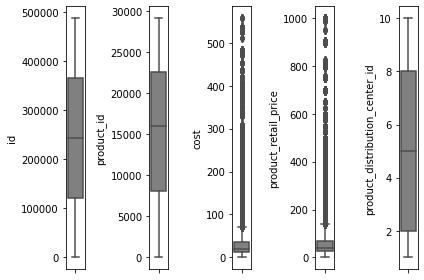

In [ ]:
# Visualisasi Boxplot untuk analisa outlier
for i in range(0, len(inv_nums)):
    plt.subplot(1, len(inv_nums), i+1)
    sns.boxplot(y=inv_items[inv_nums[i]], color='grey', orient='v')
    plt.tight_layout()

Hal penting yang harus diperhatikan dari *boxplot* adalah keberadaan *outlier*.
- *Outlier* terlihat utamanya pada kolom `cost` dan `product_retail_price`
- Dari visualisasi *boxplot*, terlihat mana distribusi yang terlihat agak *skewed* (tidak simetrik) yang ditandai dengan lokasi *box* yang menjauh dari daerah tengah sumbu Y: `cost` dan `product_retail_price`

### Multivariate Analysis

In [ ]:
inv_items.select_dtypes(['float64', 'int64']).corr()

,id,product_id,created_at,sold_at,cost,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
id,1.000000,-0.002393,-0.000028,0.001420,-0.002823,-0.001890,0.000175,-0.003294,0.001742,-0.003578,0.004094
product_id,-0.002393,1.000000,0.003674,0.002778,-0.008774,0.032078,0.038268,-0.001736,-0.864948,0.006710,0.018531
created_at,-0.000028,0.003674,1.000000,0.175701,0.001089,0.003003,0.001679,0.001101,-0.002616,-0.000936,-0.001177
sold_at,0.001420,0.002778,0.175701,1.000000,0.000444,0.001895,0.002182,0.000485,-0.002185,-0.000426,-0.001043
cost,-0.002823,-0.008774,0.001089,0.000444,1.000000,0.042227,0.033585,0.982524,-0.061215,-0.006074,0.005684
product_name,-0.001890,0.032078,0.003003,0.001895,0.042227,1.000000,0.822842,0.040969,-0.021115,-0.003715,-0.125911
product_brand,0.000175,0.038268,0.001679,0.002182,0.033585,0.822842,1.000000,0.031826,-0.023175,-0.004929,-0.108434
product_retail_price,-0.003294,-0.001736,0.001101,0.000485,0.982524,0.040969,0.031826,1.000000,-0.057661,-0.005725,-0.007425
product_department,0.001742,-0.864948,-0.002616,-0.002185,-0.061215,-0.021115,-0.023175,-0.057661,1.000000,-0.010473,-0.050553
product_sku,-0.003578,0.006710,-0.000936,-0.000426,-0.006074,-0.003715,-0.004929,-0.005725,-0.010473,1.000000,-0.007648


In [ ]:
products.select_dtypes(['float64', 'int64']).corr()

,id,cost,retail_price,distribution_center_id
id,1.000000,-0.009885,-0.003223,0.015581
cost,-0.009885,1.000000,0.982506,0.000443
retail_price,-0.003223,0.982506,1.000000,-0.012443
distribution_center_id,0.015581,0.000443,-0.012443,1.000000


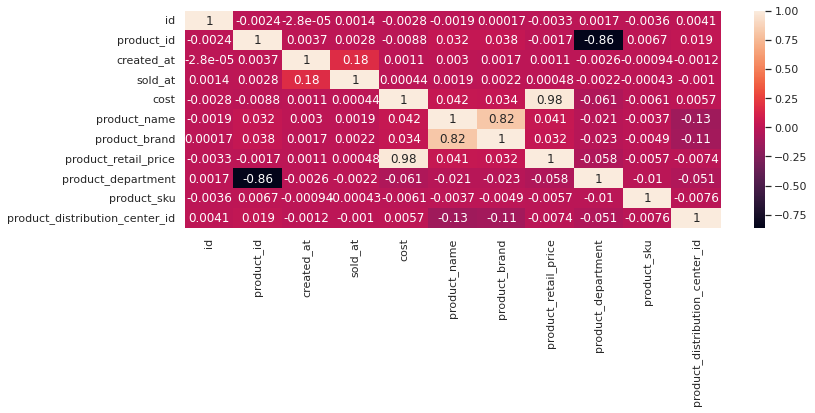

In [ ]:
sns.heatmap(inv_items.select_dtypes(['float64', 'int64']).corr(), annot=True)
plt.show()

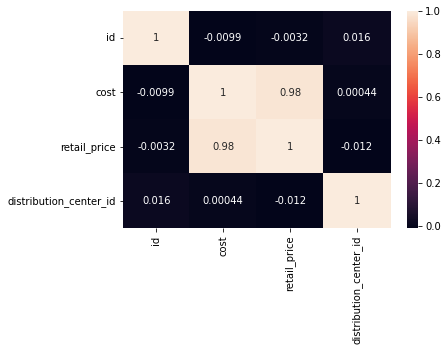

In [ ]:
sns.heatmap(products.select_dtypes(['float64', 'int64']).corr(), annot=True)
plt.show()

Dari *correlation heatmap* di atas dapat dilihat bahwa:
- Kolom `product_distribution_center_id` memiliki korelasi positif lemah dengan `id`, `product_id`.
- Kolom `cost` juga memiliki korelasi positif kuat dengan `product_retail_price`. Ada kemungkinan kedua *features* mengalami redundansi (berlebihan data informasi dalam korelasi).
- Beberapa *features* terlihat tidak berkorelasi, sehingga diabaikan saja.

### Missing Value

In [ ]:
# Cek Missing Value
data_missing_value = inv_items.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(inv_items))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,sold_at,306886,62.96
1,product_brand,374,0.08
2,product_name,35,0.01


### Handling Duplicated

In [ ]:
# Cek duplicated data
inv_items.duplicated().sum()

0

Tidak ada duplicates rows pada dataset

In [ ]:
# Duplicated data
products.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29115    False
29116    False
29117    False
29118    False
29119    False
Length: 29120, dtype: bool

### Label Encoding

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [ ]:
df_cat_inv_items.describe()

,created_at,sold_at,product_category,product_name,product_brand,product_department,product_sku
count,487394,180508,487394,487359,487020,487394,487394
unique,444495,180172,26,27247,2754,2,29050
top,2021-01-18 09:21:00+00:00,2022-03-10 07:49:24+00:00,Intimates,Wrangler Men's Premium Performance Cowboy Cut ...,Allegra K,Men,CD79499E36195AC3C3296EB666F9D39E
freq,5,3,36319,147,16392,244421,55


In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# Label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'marital'.
inv_items['created_at']= label_encoder.fit_transform(inv_items['created_at'])
inv_items['sold_at']= label_encoder.fit_transform(inv_items['sold_at'])
inv_items['product_sku']= label_encoder.fit_transform(inv_items['product_sku']) 
inv_items['product_name']= label_encoder.fit_transform(inv_items['product_name']) 
inv_items['product_brand']= label_encoder.fit_transform(inv_items['product_brand'])
inv_items['product_department']= label_encoder.fit_transform(inv_items['product_department']) 

In [ ]:
rows = []
for col in inv_items :
  rows.append(
    {
      'Nama Kolom': col,
      'Jumlah Unique Values': len(inv_items[col].unique()),
      'Unique Values': inv_items[col].unique()
    }
  )

# pd.options.display.max_colwidth = 100 #maksimal tampil 100 karakter
# maksimal tampil 70 karakter
pd.options.display.max_colwidth = 70 

# pd.options.display.max_colwidth 
# tanpa batas 
unik_inv_items = pd.DataFrame(rows)
unik_inv_items.sort_values(by='Jumlah Unique Values', ascending=True).reset_index().drop('index', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,Nama Kolom,Jumlah Unique Values,Unique Values
0,product_department,2,"[0, 1]"
1,product_distribution_center_id,10,"[3, 8, 6, 4, 7, 9, 10, 1, 2, 5]"
2,product_category,26,"[Tops & Tees, Socks & Hosiery, Accessories, Socks, Fashion Hoodies..."
3,product_brand,2755,"[2754, 1057, 197, 207, 423, 644, 974, 1156, 1225, 1377, 1386, 1530..."
4,product_retail_price,4187,"[25.0, 16.0, 24.25, 22.479999542236328, 45.950000762939446, 4.2100..."
5,cost,26315,"[13.924999965820462, 5.71199995279312, 9.554499962599948, 12.47639..."
6,product_name,27248,"[20400, 13654, 12240, 25488, 5854, 17516, 22524, 12815, 25333, 220..."
7,product_id,29050,"[16898, 9482, 13863, 25135, 1629, 13921, 25187, 10598, 15723, 1138..."
8,product_sku,29050,"[3984, 22405, 13787, 1624, 10449, 1499, 7733, 26170, 11792, 8185, ..."
9,sold_at,180173,"[69900, 180172, 19300, 74459, 51750, 115794, 54016, 148754, 92504,..."


In [ ]:
inv_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,90967,16898,245084,69900,13.925,Tops & Tees,20400,2754,25.0,0,3984,3
1,90968,16898,46770,180172,13.925,Tops & Tees,20400,2754,25.0,0,3984,3
2,90969,16898,101869,180172,13.925,Tops & Tees,20400,2754,25.0,0,3984,3
3,90970,16898,261410,180172,13.925,Tops & Tees,20400,2754,25.0,0,3984,3
4,96715,16898,56545,19300,13.925,Tops & Tees,20400,2754,25.0,0,3984,3


#### One Hot Encoding

In [ ]:
inv_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              487394 non-null  int64  
 1   product_id                      487394 non-null  int64  
 2   created_at                      487394 non-null  int64  
 3   sold_at                         487394 non-null  int64  
 4   cost                            487394 non-null  float64
 5   product_category                487394 non-null  object 
 6   product_name                    487394 non-null  int64  
 7   product_brand                   487394 non-null  int64  
 8   product_retail_price            487394 non-null  float64
 9   product_department              487394 non-null  int64  
 10  product_sku                     487394 non-null  int64  
 11  product_distribution_center_id  487394 non-null  int64  
dtypes: float64(2), i

In [ ]:
# Lihat sekilas hasil One hot encode column dan definisikan ke one_hot_columns
one_hot_columns = pd.get_dummies(inv_items[['product_category']])

# kode singkat dari kode di atas
# one_hot_columns = pd.get_dummies(object_columns)

In [ ]:
# kolom yang berada dalam one_hot_columns ingin di one hot encoding
dumies_one_hot_encod = one_hot_columns 

# bagian one hot encoding 
inv_items_updated = pd.concat([inv_items, dumies_one_hot_encod], axis = 1)

# hapus kolom yang berada di dalam one_hot_columns dari dataframe awal
inv_items_updated.drop(['product_category'], axis = 1, inplace = True)

inv_items_updated.head()

,id,product_id,created_at,sold_at,cost,product_name,product_brand,product_retail_price,product_department,product_sku,...,product_category_Skirts,product_category_Sleep & Lounge,product_category_Socks,product_category_Socks & Hosiery,product_category_Suits,product_category_Suits & Sport Coats,product_category_Sweaters,product_category_Swim,product_category_Tops & Tees,product_category_Underwear
0,90967,16898,245084,69900,13.925,20400,2754,25.0,0,3984,...,0,0,0,0,0,0,0,0,1,0
1,90968,16898,46770,180172,13.925,20400,2754,25.0,0,3984,...,0,0,0,0,0,0,0,0,1,0
2,90969,16898,101869,180172,13.925,20400,2754,25.0,0,3984,...,0,0,0,0,0,0,0,0,1,0
3,90970,16898,261410,180172,13.925,20400,2754,25.0,0,3984,...,0,0,0,0,0,0,0,0,1,0
4,96715,16898,56545,19300,13.925,20400,2754,25.0,0,3984,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
inv_items_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 37 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   id                                              487394 non-null  int64  
 1   product_id                                      487394 non-null  int64  
 2   created_at                                      487394 non-null  int64  
 3   sold_at                                         487394 non-null  int64  
 4   cost                                            487394 non-null  float64
 5   product_name                                    487394 non-null  int64  
 6   product_brand                                   487394 non-null  int64  
 7   product_retail_price                            487394 non-null  float64
 8   product_department                              487394 non-null  int64  
 9   product_sku               

### Handling Missing Value

In [ ]:
inv_items.isna().sum()

id                                0
product_id                        0
created_at                        0
sold_at                           0
cost                              0
product_category                  0
product_name                      0
product_brand                     0
product_retail_price              0
product_department                0
product_sku                       0
product_distribution_center_id    0
dtype: int64

In [ ]:
inv_items.isna().sum()/inv_items.shape[0]

id                                0.0
product_id                        0.0
created_at                        0.0
sold_at                           0.0
cost                              0.0
product_category                  0.0
product_name                      0.0
product_brand                     0.0
product_retail_price              0.0
product_department                0.0
product_sku                       0.0
product_distribution_center_id    0.0
dtype: float64

### Handling Outlier

## Data Splitting

In [ ]:
X = inv_items.iloc[:, :-1].values
print(X)

[[90967 16898 245084 ... 25.0 0 3984]
 [90968 16898 46770 ... 25.0 0 3984]
 [90969 16898 101869 ... 25.0 0 3984]
 ...
 [290891 14392 422000 ... 35.720001220703125 1 11141]
 [301361 14392 213175 ... 35.720001220703125 1 11141]
 [301362 14392 73299 ... 35.720001220703125 1 11141]]


In [ ]:
Y = inv_items.iloc[:, :-1].values
print(Y)

[[90967 16898 245084 ... 25.0 0 3984]
 [90968 16898 46770 ... 25.0 0 3984]
 [90969 16898 101869 ... 25.0 0 3984]
 ...
 [290891 14392 422000 ... 35.720001220703125 1 11141]
 [301361 14392 213175 ... 35.720001220703125 1 11141]
 [301362 14392 73299 ... 35.720001220703125 1 11141]]


In [ ]:
print(inv_items["cost"].min())
print(inv_items["cost"].max())
print(inv_items["cost"].mean())

0.0082999997779726
557.1510021798313
28.74637397598631


## Join Table

In [ ]:
# Fungsi Inner Join
inner_join = pd.merge(inv_items, products, on ='id', how ='inner')

In [ ]:
inner_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29120 entries, 0 to 29119
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              29120 non-null  int64  
 1   product_id                      29120 non-null  int64  
 2   created_at                      29120 non-null  int64  
 3   sold_at                         29120 non-null  int64  
 4   cost_x                          29120 non-null  float64
 5   product_category                29120 non-null  object 
 6   product_name                    29120 non-null  int64  
 7   product_brand                   29120 non-null  int64  
 8   product_retail_price            29120 non-null  float64
 9   product_department              29120 non-null  int64  
 10  product_sku                     29120 non-null  int64  
 11  product_distribution_center_id  29120 non-null  int64  
 12  cost_y                          

## Modelling